In [1]:
import pandas

In [2]:
stock_info=pandas.read_csv('Stock_Dataset.csv')

In [3]:
stock_info

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change,Price_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836,-0.012635
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364,-0.015849
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683,-0.026000
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713,0.001992
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283,0.032787
...,...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748,-0.014501
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949,-0.051572
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307,0.029715
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784,-0.020466


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from seaborn import scatterplot
import matplotlib.pyplot as pyplot

In [15]:
y=stock_info.iloc[:,-1:]
x=stock_info.iloc[:,:-1]

In [16]:
x

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283
...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784


In [17]:
y

,Price_Change
0,-0.012635
1,-0.015849
2,-0.026000
3,0.001992
4,0.032787
...,...
8108,-0.014501
8109,-0.051572
8110,0.029715
8111,-0.020466


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=421,test_size=0.225,shuffle=True)

In [19]:
len(x_test)

1826

In [20]:
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,random_state=124,test_size=.375,shuffle=True)

In [21]:
print(len(x_train),len(x_test),len(x_val))

6287 1141 685


In [22]:
def x_imputer(dataset):
    imputer=KNNImputer(n_neighbors=3)
    x_impute=imputer.fit_transform(dataset)
    x_impute=pandas.DataFrame(data=x_impute,columns=['Return_On_Equity','Current_Ratio','Asster_Turnover','WACC','Dividend_Yield','Earnings_Yield','Revenue_Change','Net_Income_Change'])
    return x_impute
x_train=x_imputer(x_train)
x_test=x_imputer(x_test)
x_val=x_imputer(x_val)

y_train=y_train.apply(lambda col: col.fillna(col.mean()))
y_test=y_test.apply(lambda col: col.fillna(col.mean()))
y_val=y_val.apply(lambda col: col.fillna(col.mean()))

In [23]:
x_train.isnull().astype(int).sum()/len(x_train)

Return_On_Equity     0.0
Current_Ratio        0.0
Asster_Turnover      0.0
WACC                 0.0
Dividend_Yield       0.0
Earnings_Yield       0.0
Revenue_Change       0.0
Net_Income_Change    0.0
dtype: float64

In [24]:
y_train=y_train.pop('Price_Change')
y_test=y_test.pop('Price_Change')
y_val=y_val.pop('Price_Change')

In [25]:
xgbooster=XGBRegressor(n_estimators=1000,max_depth=10,eta=.001,subsample=.75,colsample_bytree=.9,num_parallel_tree=3)

In [26]:
xgbooster.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.001, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=3, ...)

In [27]:
y_predict=xgbooster.predict(x_test.values)

<Axes: xlabel='Price_Change'>

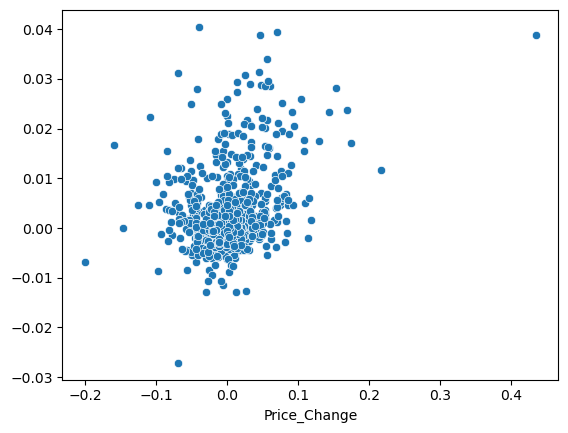

In [28]:
scatterplot(x=y_test,y=y_predict)

In [29]:
error=(mean_squared_error(y_test,y_predict)**.5)
error

0.034617666468004384

Sensitivity analysis for max depth and parallel trees

In [31]:
min_tree_errors=[]
min_errors=[]
for k in list(range(1,21)):
    errors=[]
    for j in list(range(1,4)):
        xgbooster=XGBRegressor(n_estimators=1000,max_depth=k,eta=.001,subsample=.75,colsample_bytree=.9,num_parallel_tree=j)
        xgbooster.fit(x_train,y_train)
        y_predict=xgbooster.predict(x_test.values)
        error=(mean_squared_error(y_test,y_predict)**.5)
        errors.append(error)
        print(k,j)
    min_errors.append(min(errors))
    min_tree_errors.append(int(errors.index(min(errors)))+1)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3
4 1
4 2
4 3
5 1
5 2
5 3
6 1
6 2
6 3
7 1
7 2
7 3
8 1
8 2
8 3
9 1
9 2
9 3
10 1
10 2
10 3
11 1
11 2
11 3
12 1
12 2
12 3
13 1
13 2
13 3
14 1
14 2
14 3
15 1
15 2
15 3
16 1
16 2
16 3
17 1
17 2
17 3
18 1
18 2
18 3
19 1
19 2
19 3
20 1
20 2
20 3


In [32]:
print('A max depth of '+str(((min_errors.index(min(min_errors)))+7))+' and a parallel tree count of '+str(min_tree_errors[min_errors.index(min(min_errors))])+' yields a minimum standard error of '+str(min(min_errors))+'%.')

A max depth of 14 and a parallel tree count of 1 yields a minimum standard error of 0.03459845364979156%.


Final Evaluation of Model

In [44]:
xgbooster=XGBRegressor(n_estimators=1000,max_depth=7,eta=.001,subsample=.75,colsample_bytree=.9,num_parallel_tree=1)
xgbooster.fit(x_train,y_train)
y_evaluation=xgbooster.predict(x_val.values)
error=(mean_squared_error(y_val,y_evaluation)**.5)*100
error

3.0735225948662306

In [37]:
error=(mean_squared_error(y_val,y_evaluation)**.5)*100
error

3.0735010151653306

In [45]:
print((-1.96*error),(1.96*error))

-6.0241042859378116 6.0241042859378116


(-0.02, 0.04)

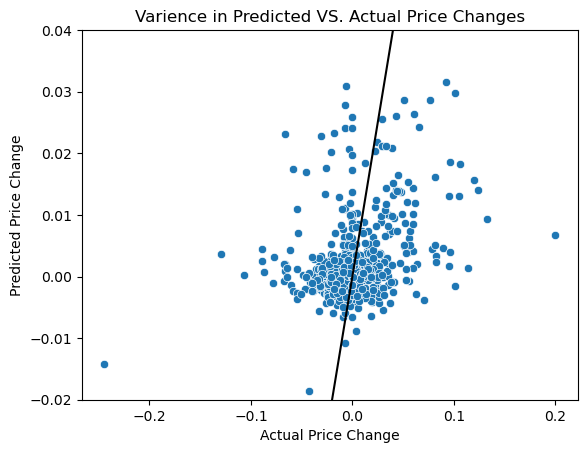

In [46]:
scatterplot(x=y_val,y=y_evaluation)
pyplot.ylabel('Predicted Price Change')
pyplot.xlabel('Actual Price Change')
pyplot.title('Varience in Predicted VS. Actual Price Changes')
pyplot.plot([-.2,.2],[-.2,.2],color='black')
pyplot.ylim([-.02,.04])
